This example was taken from the book **The Essence of Chaos** by *Edward Lorenz*. 

$$\frac{dX}{dt} = U,$$
$$\frac{dY}{dt} = V,$$
$$\frac{dZ}{dt} = W,$$
$$\frac{dU}{dt} = -FH_X - cU,$$
$$\frac{dV}{dt} = -FH_Y - cV,$$
$$\frac{dW}{dt} = -g + F - cW.$$

In [154]:
using Plots
plotly()

Plots.PlotlyBackend()

In [92]:
a = 0.25
b = 0.5
q = (2π)/4.0
p = (2π)/10.0
H_test(x,y) = -a*x - b*cos(p*x)*cos(q*y) 

H_test (generic function with 1 method)

In [93]:
function generate_slope(G, xx_range, yy_range)
    
    slope = zeros(length(x_range), length(y_range))
    
    for i in 1:length(xx_range)
        for j in 1:length(xx_range)
            
            slope[i,j] = G(xx_range[i], yy_range[j])
            
        end
    end
    
    slope
    
end

generate_slope (generic function with 1 method)

In [94]:
x_range = 0:0.1:10
y_range = 0:0.1:10

0.0:0.1:10.0

In [95]:
sol = generate_slope(H_test, x_range, y_range)

101×101 Array{Float64,2}:
 -0.5       -0.493844  -0.475528  …   0.475528    0.493844    0.5      
 -0.524013  -0.51787   -0.49959       0.44959     0.46787     0.474013 
 -0.546057  -0.53995   -0.521779      0.421779    0.43995     0.446057 
 -0.566144  -0.560097  -0.542105      0.392105    0.410097    0.416144 
 -0.584292  -0.578329  -0.560589      0.360589    0.378329    0.384292 
 -0.600528  -0.594674  -0.577254  …   0.327254    0.344674    0.350528 
 -0.614888  -0.609165  -0.592135      0.292135    0.309165    0.314888 
 -0.627414  -0.621844  -0.605271      0.255271    0.271844    0.277414 
 -0.638153  -0.632759  -0.616709      0.216709    0.232759    0.238153 
 -0.647164  -0.641966  -0.626502      0.176502    0.191966    0.197164 
 -0.654508  -0.649528  -0.63471   …   0.13471     0.149528    0.154508 
 -0.660257  -0.655513  -0.641401      0.0914008   0.105513    0.110257 
 -0.664484  -0.659997  -0.646645      0.0466452   0.0599969   0.0644843
  ⋮                               ⋱   

In [96]:
surface(x_range, y_range, sol, color=:blues)

In [7]:
function runge_kutta_step(f::Function, x0, dt, F, H, c)
       
    k1 = f(x0, F, H, c) * dt
    k2 = f(x0 + k1/2, F, H, c) * dt
    k3 = f(x0 + k2/2, F, H, c) * dt
    k4 = f(x0 + k3, F, H, c) * dt
    x_new = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return x_new
end

runge_kutta_step (generic function with 1 method)

In [71]:
dU(u0, F, H_x, c) = -F*H_x - c*u0
dV(v0, F, H_y, c) = -F*H_y - c*v0

dV (generic function with 1 method)

In [97]:
function ski_slope(x0, y0, u0, v0, n, dt)
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2π)/10.0
    q = (2π)/4.0
   
    solution = zeros(n+1, 2)
    solution[1, 1] = x0
    solution[1,2] = y0
    
    for i in 2:n+1
        
        H = -a*x0 - b*cos(p*x0)*cos(q*y0) 
        H_x = -a + b*p*sin(p*x0)*cos(q*y0)
        H_xx = b*p^2 * cos(p*x0)*cos(q*y0)
        H_y = b*q*cos(p*x0)*sin(q*y0)
        H_yy = b*q^2 * cos(p*x0)*cos(q*y0)
        H_xy = -b*q*p*sin(p*x0)*sin(q*y0)
        
        F = (g + H_xx*u0^2 + 2*H_xy*u0*v0 + H_yy*v0^2)/(1 + H_x^2 + H_y^2)
        u_new = runge_kutta_step(dU, u0, dt, F, H_x, c)
        v_new = runge_kutta_step(dV, v0, dt, F, H_y, c)
        x_new = x0 + u0 * dt
        y_new = y0 + v0 * dt
        
        solution[i, 1] = x_new
        solution[i, 2] = y_new
        
        x0 = copy(x_new)
        y0 = copy(y_new)
        u0 = copy(u_new)
        v0 = copy(v_new)
        
    end
    
    solution
    
end

ski_slope (generic function with 2 methods)

### Example 1

Initial conditions: $x = 0.0$, $y = 0.5$, $U = 4.0$ and $V = 2.0$.

In [186]:
pyplot()

Plots.PyPlotBackend()

In [187]:
function various_sol_generator(N, x0, y0, u0, v0, n, dt, dy)
    solutions = Any[]
    
    for i in 1:N
        Δy = (i-1)*dy
        trayectory = ski_slope(x0, y0 + Δy, u0, v0, n, dt)
        push!(solutions, trayectory)
    end
    
    return solutions
end

various_sol_generator (generic function with 2 methods)

In [188]:
function plot_various(A)
    
    plot(A[1][:,2], A[1][:,1], yflip=true, size =(300, 600), leg = false)
    
    for i in 2:length(A)
        plot!(A[i][:,2], A[i][:,1])
    end
    plot!()
end

plot_various (generic function with 1 method)

In [109]:
x_1 = 0.0
y_1 = 0.5
U_1 = 4.0
V_1 = 2.0
n = 800
dt = 0.01

0.01

In [189]:
t_e1_30 = various_sol_generator(7, x_1, y_1, U_1, V_1, 800, dt, 0.1)

7-element Array{Any,1}:
 [0.0 0.5; 0.04 0.52; … ; 26.9153 3.10225; 26.9465 3.11961]
 [0.0 0.6; 0.04 0.62; … ; 28.4395 9.48005; 28.4702 9.46369]
 [0.0 0.7; 0.04 0.72; … ; 28.5036 3.82725; 28.5378 3.80475]
 [0.0 0.8; 0.04 0.82; … ; 31.442 12.5417; 31.4813 12.559]  
 [0.0 0.9; 0.04 0.92; … ; 31.6089 7.03527; 31.6452 7.05835]
 [0.0 1.0; 0.04 1.02; … ; 30.828 4.69078; 30.872 4.6726]   
 [0.0 1.1; 0.04 1.12; … ; 32.3397 8.18006; 32.3694 8.21152]


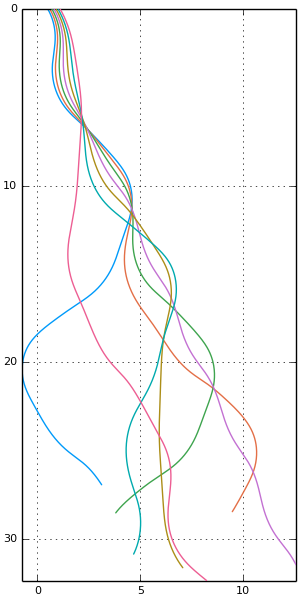

In [190]:
plot_various(t_e1_30)

The same initial contidions but we let the 5 boars travel 60 meters

In [191]:
t_e1_60 = various_sol_generator(7, x_1, y_1, U_1, V_1, 1600, 0.01, 0.1)

7-element Array{Any,1}:
 [0.0 0.5; 0.04 0.52; … ; 54.3335 3.7197; 54.3621 3.71074]   
 [0.0 0.6; 0.04 0.62; … ; 56.7595 -2.52362; 56.8012 -2.51812]
 [0.0 0.7; 0.04 0.72; … ; 55.939 10.6311; 55.9673 10.6011]   
 [0.0 0.8; 0.04 0.82; … ; 60.1785 22.4209; 60.2095 22.4285]  
 [0.0 0.9; 0.04 0.92; … ; 60.5733 19.5856; 60.6078 19.6143]  
 [0.0 1.0; 0.04 1.02; … ; 61.7036 -8.44456; 61.7355 -8.47342]
 [0.0 1.1; 0.04 1.12; … ; 60.9204 13.4343; 60.959 13.4258]   


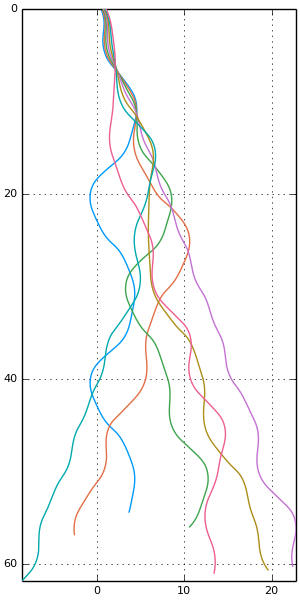

In [192]:
plot_various(t_e1_60)